In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import os
os.environ['PROJ_LIB'] = '/home/jhemedinger/anaconda3/envs/precip_env/share/proj/'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
import glob
import pyart 
import shutil
from tint.tracks import Cell_tracks
from tint.visualization import animate, embed_mp4_as_gif


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Creating custom colormap to use on sat animation and tracking plots
# Create by Sam Carani summer 2018

vmin = 198
vmax = 320
lcl = 269.5


colormap = pyart.graph.cm_colorblind.HomeyerRainbow
colors2 = colormap(np.linspace(0, 1, int(((250-vmin)/(vmax-vmin))*1000)))
colors3 = plt.cm.Greys_r(np.linspace(.3, .5, int(((lcl-250)/(vmax-vmin))*1000)))
colors4 = plt.cm.Greys_r(np.linspace(.15, .2, int(((vmax-lcl)/(vmax-vmin))*1000)))
colors = np.vstack((colors4, colors3, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/h

/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/ho

/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/h

/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/ho

/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/h

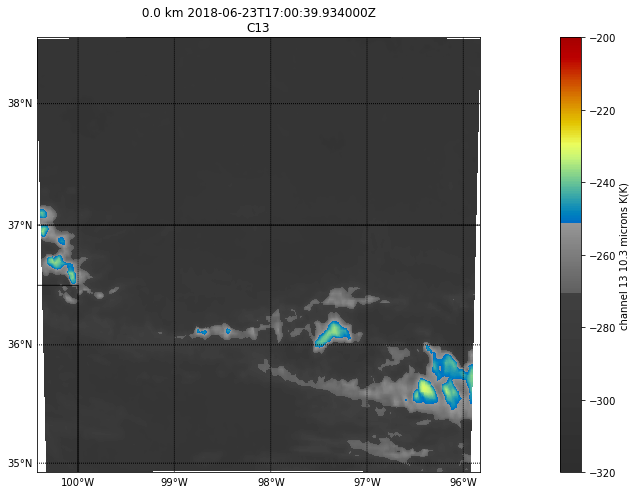

<function matplotlib.pyplot.close(fig=None)>

In [3]:
# Creating an animation of the GOES grids using PyART
def sat_animation(nframe, cmap=mymap):
    files = glob.glob('/home/jhemedinger/suli_projects/precipitation-onset/'
                      + 'grids/sat_grids/*')
    files.sort()
    
    plt.clf()
    nfile = files[nframe]
    
    radar = pyart.io.read_grid(nfile)
    
    display = pyart.graph.GridMapDisplay(radar)
    display.plot_grid('c13', cmap=cmap, vmin=-320, vmax=-200)
    display.plot_basemap()
    del radar, display

fig = plt.figure(figsize=[12,8])
sat_anim = FuncAnimation(fig, sat_animation, frames=60)
sat_anim.save('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_animation.gif',
              writer='imagemagick', fps=3)
plt.show()
plt.close

In [4]:
# Obtain sorted list of GOES grid files
data_dir = '/home/jhemedinger/suli_projects/precipitation-onset/grids/sat_grids/OR_*'
grid_files = glob.glob(data_dir, recursive=True)
grid_files.sort()
len(grid_files)

60

In [5]:
# Creating a grid generator to be able to read the goes grids into TINT
grid_gen = (pyart.io.read_grid(grid_name) for grid_name in grid_files)

# Instantiate tracks object and view parameter defaults
tracks_obj = Cell_tracks(field='c13')

# Adjusting size parameter
# Default parameter values and documentation can be found in TINT
# https://github.com/openradar/TINT/blob/master/tint/tracks.py
tracks_obj.params['FIELD_THRESH'] = -250 
tracks_obj.params['FLOW_MARGIN'] = 10000
tracks_obj.params['GS_ALT'] = 0
tracks_obj.params['ISO_SMOOTH'] = 3
tracks_obj.params['ISO_THRESH'] = 8
tracks_obj.params['MAX_DISPARITY'] = 999
tracks_obj.params['MAX_FLOW_MAG'] = 50
tracks_obj.params['MAX_SHIFT_DISP'] = 15
tracks_obj.params['MIN_SIZE'] = 32
tracks_obj.params['SEARCH_MARGIN'] = 4000

# Printing parameter values to screen
# print(tracks_obj.params)

# Get tracks from grid generator
tracks_obj.get_tracks(grid_gen)

Writing tracks for scan 0
Writing tracks for scan 1
Writing tracks for scan 2
Writing tracks for scan 3
Writing tracks for scan 4
Writing tracks for scan 5
Writing tracks for scan 6
Writing tracks for scan 7
Writing tracks for scan 8
Writing tracks for scan 9
Writing tracks for scan 10
Writing tracks for scan 11
Writing tracks for scan 12
Writing tracks for scan 13
Writing tracks for scan 14
Writing tracks for scan 15
Writing tracks for scan 16
Writing tracks for scan 17
Writing tracks for scan 18
Writing tracks for scan 19
Writing tracks for scan 20
Writing tracks for scan 21
Writing tracks for scan 22
Writing tracks for scan 23
Writing tracks for scan 24
Writing tracks for scan 25
Writing tracks for scan 26
Writing tracks for scan 27
Writing tracks for scan 28
Writing tracks for scan 29
Writing tracks for scan 30
Writing tracks for scan 31
Writing tracks for scan 32
Writing tracks for scan 33
Writing tracks for scan 34
Writing tracks for scan 35
Writing tracks for scan 36
Writing tra

In [ ]:
# Checking if an mp4 file already exists, if true then the file is deleted
# If animate function below is ran without deleting existing mp4 file
# the original file will not be overwritten and an error will occur

if os.path.exists('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks.mp4'):
    print('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks.mp4'
          + ' already exists, removing file')
    os.remove('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks.mp4')

if os.path.exists('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks_frames'):
    print('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks_frames'
          + ' already exists, removing directory')
    shutil.rmtree('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks_frames')

/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks.mp4 already exists, removing file
/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks_frames already exists, removing directory


In [ ]:
# Creating a grid generator to be able to read the grids into TINT
anim_gen = (pyart.io.read_grid(grid_name) for grid_name in grid_files)

# Create animation and saving it to a specific location
animate(tracks_obj, anim_gen, '/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks',
        keep_frames=True, vmin = -320, vmax = -198, cmap = mymap, tracers=True)

Animating 60 frames
Frame: 0


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 1


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 2


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 3


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 4


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 5


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 6


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 7


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 8


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 9


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 10


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 11


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 12


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 13


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 14


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 15


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 16


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 17


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 18


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 19


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 20


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 21


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 22


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 23


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 24


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 25


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 26


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 27


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 28


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 29


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 30


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 31


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 32


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 33


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 34


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 35


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 36


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 37


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 38


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 39


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 40


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 41


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 42


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 43


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 44


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 45


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 46


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 47


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 48


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 49


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 50


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 51


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 52


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 53


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 54


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 55


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


Frame: 56


/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/pyart/graph/gridmapdisplay.py:72: DeprecationWarning: GridMapDisplay will be switching to Cartopy in the next Py-ART release 1.11.0. Basemap is still optional to use in GridMapDisplayBasemap but there will be no support if an error appears.
  DeprecationWarning)
/home/jhemedinger/anaconda3/envs/goes_env/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


In [ ]:
# Displaying TINT tracks
embed_mp4_as_gif('/home/jhemedinger/suli_projects/precipitation-onset/plots/sat_tracks.mp4')